# Лабораторная работа 7

### Задание 1
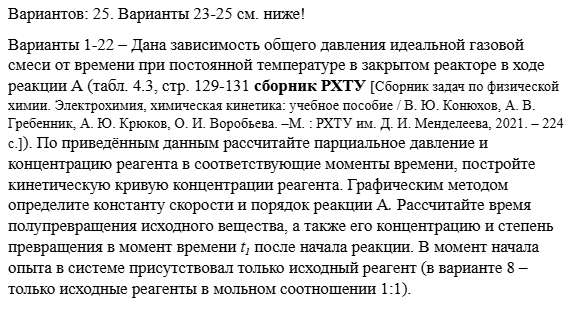
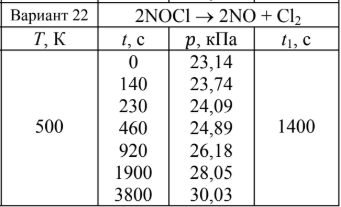

In [29]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

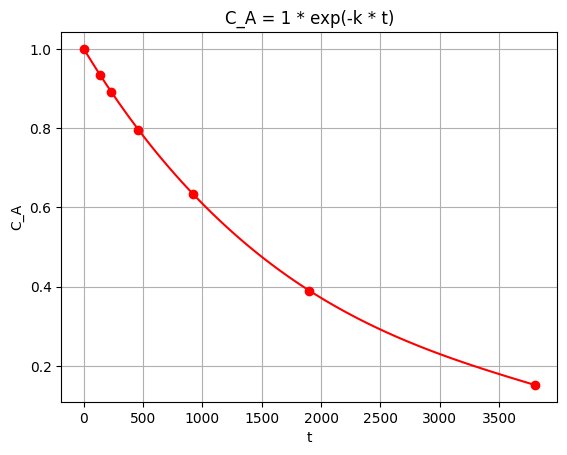

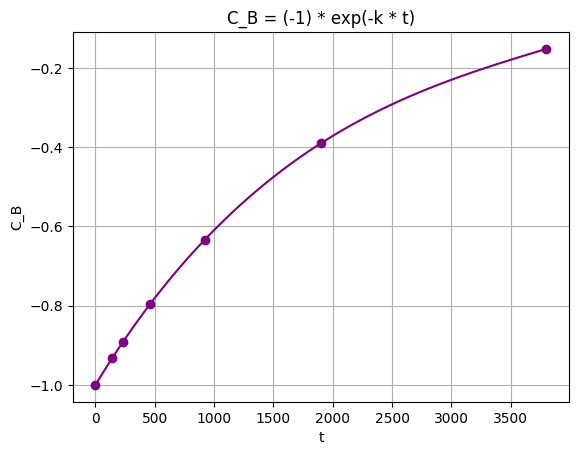

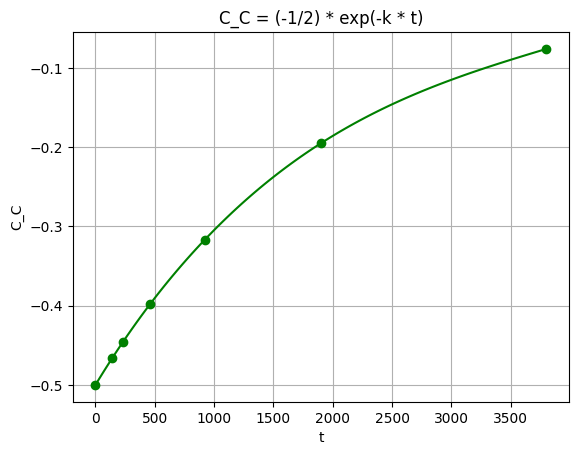

Ответ: 
а) график*
б) k = 0.0004951051289713895
в) первый порядок реакции
г) время полупревращения = 1400c
д) С(t1) = 0.49960396371152516
e) e = 0.5003960362884748


In [54]:
# w_A = dC_A/dt = -2r = -2k * C_A (1)
# w_B = dC_B/dt = 2r = 2k * C_A
# w_B = dC_C/dt = r = k * C_A

# r = 1/v_i*dC_i/dt = -1/2 * dC_A/dt = 1/2 * dC_B/dt = dC_C/dt

# (1) => C_A(t) = 1/t * 1/2k + C_A0 
#  имеем C(t) = 1/t, => 1/C(t) = t (реакция первого порядка)
# t_1/2 = ln2/k => k = ln2 / t_1/2
t_half = 1400;
k = math.log(2) / t_half;

# C_A = 1 * exp(-k * t)
def C_A(t):
    C_A = 1 * math.exp(-k * t)
    return C_A

def C_B(t):
    C_A = 1 * math.exp(-k * t)
    C_B = C_A * (-1)
    return C_B

def C_C(t):
    C_A = 1 * math.exp(-k * t)
    C_C = C_A * (-1/2)
    return C_C


#A
t = [0, 140, 230, 460, 920, 1900, 3800]
C_A = [C_A(0), C_A(140), C_A(230), C_A(460), C_A(920), C_A(1900), C_A(3800)]  
new_t = np.linspace(0, 3800, 100)
interp_func = interp1d(t, C_A, kind='cubic')
new_C_A = interp_func(new_t)
plt.figure(1)
plt.plot(new_t, new_C_A, color="red", label='Интерполяция (cubic)')
plt.plot(t, C_A, 'o', color='red', label='Исходные данные')  
plt.title("C_A = 1 * exp(-k * t)"); plt.xlabel("t"); plt.ylabel("C_A"); plt.grid(); plt.show()

# t_1/2 = 1400 (дано)
t1 = 1400;
# C = C(t1)
C = interp_func(t1)

# e = (C0 - C(t1)) / C0
C0 = 1 #(усл.)
e = (C0 - C) / C0


#B
t = [0, 140, 230, 460, 920, 1900, 3800]
C_B = [C_B(0), C_B(140), C_B(230), C_B(460), C_B(920), C_B(1900), C_B(3800)]  
new_t = np.linspace(0, 3800, 100)
interp_func = interp1d(t, C_B, kind='cubic')
new_C_B = interp_func(new_t)
plt.figure(2)
plt.plot(new_t, new_C_B, color="purple", label='Интерполяция (cubic)')
plt.plot(t, C_B, 'o', color='purple', label='Исходные данные')  
plt.title("C_B = (-1) * exp(-k * t)"); plt.xlabel("t"); plt.ylabel("C_B"); plt.grid(); plt.show()

#B
t = [0, 140, 230, 460, 920, 1900, 3800]
C_C = [C_C(0), C_C(140), C_C(230), C_C(460), C_C(920), C_C(1900), C_C(3800)]  
new_t = np.linspace(0, 3800, 100)
interp_func = interp1d(t, C_C, kind='cubic')
new_C_C = interp_func(new_t)
plt.figure(2)
plt.plot(new_t, new_C_C, color="green", label='Интерполяция (cubic)')
plt.plot(t, C_C, 'o', color='green', label='Исходные данные')  
plt.title("C_C = (-1/2) * exp(-k * t)"); plt.xlabel("t"); plt.ylabel("C_C"); plt.grid(); plt.show()

print(f"Ответ: \nа) график*\nб) k = {k}\nв) первый порядок реакции\nг) время полупревращения = {t_half}c\nд) С(t1) = {C}\ne) e = {e}")

### Теория